### Importing neccessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

### Reading data via pandas 

In [2]:
crimes_df = pd.read_csv('crime.csv',sep=',', encoding='latin-1')
crimes_df.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


Q1: Present an overall summary of the data. Describe what it is about e.g., total number
of data points, how many types of crimes, number of districts, number of years etc.

In [3]:
datapoints, features = crimes_df.shape
print("Number of datapoints ",datapoints)

Number of datapoints  319073


In [7]:
types_of_crimes = len(crimes_df['OFFENSE_CODE_GROUP'].unique())
print("Types crimes ",types_of_crimes)

Types crimes  67


In [8]:
years_of_records = len(crimes_df['YEAR'].unique())
print("Types crimes ",years_of_records)

Types crimes  4


In [6]:
dists = len(crimes_df['DISTRICT'].unique())

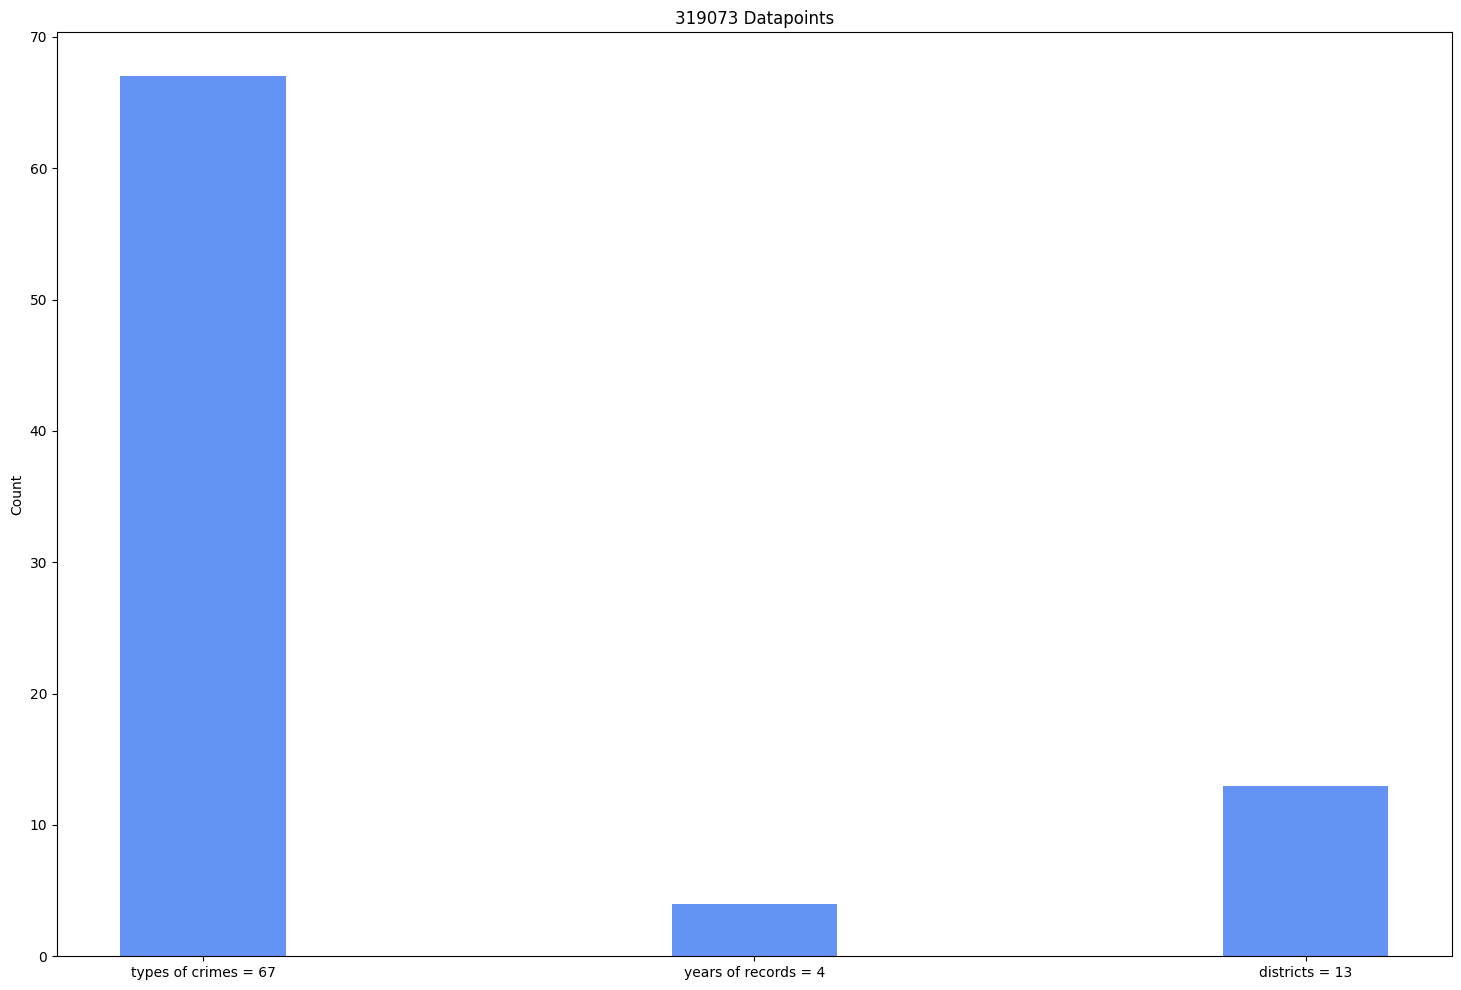

In [7]:
plt.rcParams['figure.figsize'] = (18,12)
x = np.array(["types of crimes = {}".format(types_of_crimes), "years of records = {}".format(years_of_records), "districts = {}".format(dists)])
y = np.array([ types_of_crimes,years_of_records , dists])
plt.ylabel("Count")
plt.title("{} Datapoints".format(datapoints))
plt.bar(x,y,width=0.3,color='#6593F5')
plt.show()

In [8]:
df = crimes_df['OFFENSE_CODE_GROUP'].value_counts()
df = pd.DataFrame(df)
df['CRIMES'] = df.index
df.reset_index(drop=True, inplace=True)
df

,OFFENSE_CODE_GROUP,CRIMES
0,37132,Motor Vehicle Accident Response
1,25935,Larceny
2,23540,Medical Assistance
3,18750,Investigate Person
4,18075,Other
...,...,...
62,7,HUMAN TRAFFICKING
63,4,INVESTIGATE PERSON
64,2,Biological Threat
65,2,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE


### Most occuring incident

In [9]:
df.loc[df['OFFENSE_CODE_GROUP']==df['OFFENSE_CODE_GROUP'].max()]

,OFFENSE_CODE_GROUP,CRIMES
0,37132,Motor Vehicle Accident Response


### Districts and crimes plot

In [10]:
hotzones = crimes_df.value_counts(subset=['DISTRICT'],dropna=True)
hotzones = pd.DataFrame(hotzones)
hotzones['dists'] = hotzones.index
hotzones.reset_index(drop=True,inplace=True)
hotzones['dists'] = hotzones['dists'].map(lambda x : x[0])
hotzones.rename(columns={0:'Incidents'},inplace=True)
hotzones

,Incidents,dists
0,49945,B2
1,42530,C11
2,41915,D4
3,35717,A1
4,35442,B3
5,23460,C6
6,20127,D14
7,17536,E13
8,17348,E18
9,13544,A7


([<matplotlib.patches.Wedge at 0x7f8875d0bb50>,
 [Text(0.968229944571202, 0.5220448011767259, 'B2'),
  Text(0.1760416458559651, 1.0858219646536549, 'C11'),
  Text(-0.6876801219274803, 0.8585429808144762, 'D4'),
  Text(-1.091163436142967, 0.1391486817209315, 'A1'),
  Text(-0.921498938426773, -0.600699347825791, 'B3'),
  Text(-0.438400902670957, -1.0088630474634752, 'C6'),
  Text(0.023772976340971627, -1.0997430816312925, 'D14'),
  Text(0.42278746716405874, -1.0155051736003122, 'E13'),
  Text(0.7416228182034831, -0.8124011296889755, 'E18'),
  Text(0.9518246862765041, -0.5513889431196773, 'A7'),
  Text(1.0630614439739137, -0.28266652850328394, 'E5'),
  Text(1.0977194274589976, -0.07079589380105754, 'A15')])

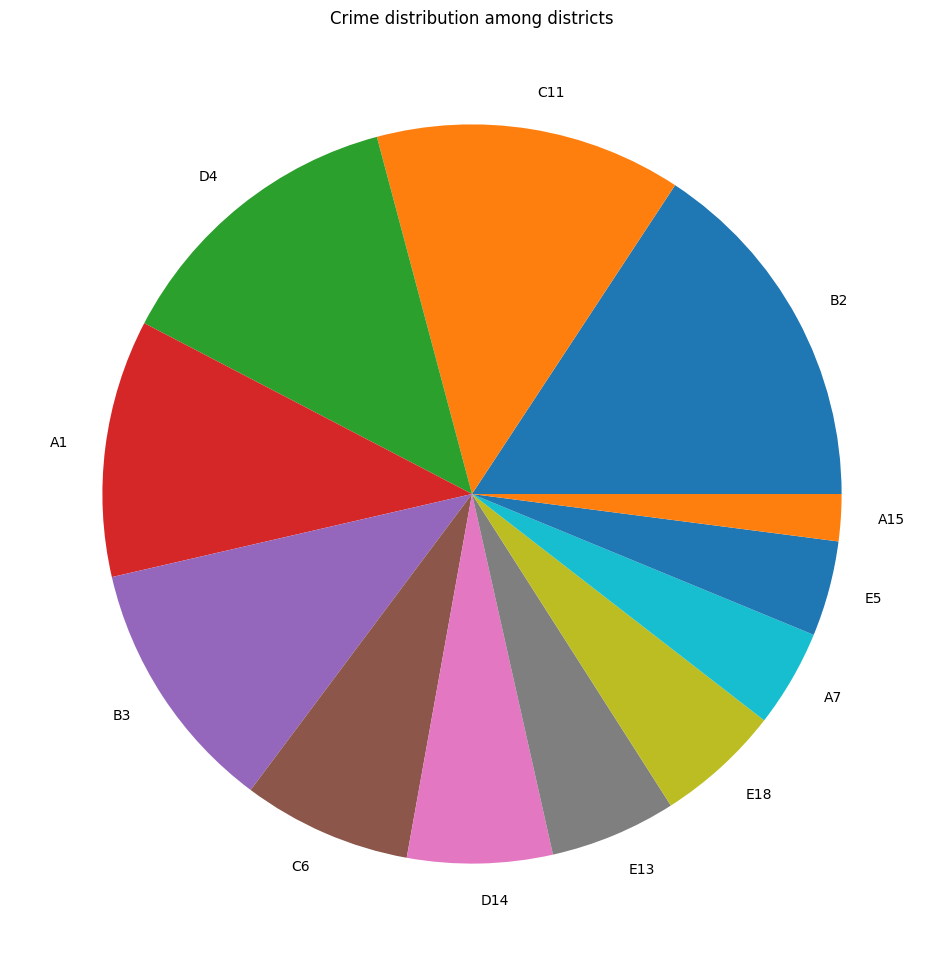

In [11]:
plt.title('Crime distribution among districts')
plt.pie(hotzones['Incidents'],labels=hotzones['dists'])

### We can infer that the B2 District has the highest number of crimes recorded

In [13]:
yrs = crimes_df['YEAR'].unique()
dists = crimes_df['DISTRICT'].unique()
months = crimes_df['MONTH'].unique()


In [14]:
monthly_crimes = crimes_df['MONTH'].value_counts(dropna=True,normalize=True)
monthly_crimes = pd.DataFrame(monthly_crimes)
monthly_crimes['MONTHS'] = monthly_crimes.index
monthly_crimes.reset_index(drop=True,inplace=True)
monthly_crimes.rename(columns={'MONTH':'CR'},inplace=True)
monthly_crimes.sort_values(by=['MONTHS'],inplace=True)
monthly_crimes

,CR,MONTHS
9,0.073996,1
11,0.067862,2
6,0.075675,3
7,0.075487,4
4,0.082110,5
2,0.095803,6
1,0.108301,7
0,0.109138,8
3,0.083188,9
5,0.080662,10


## This is plot is based on normalized frequencies of crimes occurring per month, The plot depicts rise around 7th and 8th month pointing the main to be in between these months

In [19]:
px.line(x=monthly_crimes['MONTHS'],y=monthly_crimes['CR'],title='Cummulative crime rate trend for a year').update_layout(
    xaxis_title="Months", yaxis_title="Crime count"
)
